https://towardsdatascience.com/getting-started-with-time-series-using-pandas-b6b9c9d11949

https://github.com/parulnith/Website-articles-datasets/blob/master/Getting%20started%20with%20Time%20Series%20using%20Pandas/Getting%20started%20with%20Time%20Series%20using%20Pandas.ipynb

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

# Components of Time Series

Time series data mainly consists of four components:

 Trend Component: A variation that moves up or down in a reasonably predictable pattern over a long period.
   
   Seasonality Component: The variation that is regular and periodic and repeats itself over a specific period such as a day, week, month, season, etc.,
   
   Cyclical Component: The variation that corresponds with business or economic ‘boom-bust’ cycles or follows their peculiar cycles, and
  
  Random Component: The variation that is erratic or residual and does not fall under any of the above three classifications.

In [2]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 

# Settings for pretty nice plots 
plt.style.use('fivethirtyeight')
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading in the data
df = pd.read_csv('./datasets/maruti_stock/maruti_stocks.csv')

In [4]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14,NaN,8537695.0,0.2428
1,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170
2,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14,NaN,3014852.0,0.2568
3,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064313e+14,NaN,1949217.0,0.3258
4,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092001e+14,NaN,1307694.0,0.2118


In [5]:
#To keep things simple, let's limit the number of columns.
data = df[['Date','Open','High','Low','Close','Volume','VWAP']]
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4305 non-null   object 
 1   Open    4305 non-null   float64
 2   High    4305 non-null   float64
 3   Low     4305 non-null   float64
 4   Close   4305 non-null   float64
 5   Volume  4305 non-null   int64  
 6   VWAP    4305 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 235.6+ KB


In [6]:
data

,Date,Open,High,Low,Close,Volume,VWAP
0,2003-07-09,164.90,170.40,155.00,164.30,35164283,165.95
1,2003-07-10,167.00,168.70,164.50,167.00,10464179,166.74
2,2003-07-11,167.75,174.85,166.25,173.35,11740117,172.45
3,2003-07-14,174.25,179.25,174.25,177.95,5982324,177.91
4,2003-07-15,200.00,200.00,173.00,176.20,6173689,176.88
...,...,...,...,...,...,...,...
4300,2020-10-26,7100.00,7161.30,6935.05,7054.80,1559361,7056.34
4301,2020-10-27,7067.00,7209.75,7053.00,7158.40,1461819,7139.86
4302,2020-10-28,7194.95,7332.00,7110.00,7186.05,1645177,7240.73
4303,2020-10-29,7114.00,7199.00,6986.70,7117.70,1434853,7092.42


It appears that the Date column is being treated as a string rather than as dates. Let’s make things right. For this, we shall use the pandas’ to_datetime feature, which converts the arguments to dates. Lastly, we want to make sure that the Date column is the index column.

In [7]:
# Converting string to datetime64
data['Date'] = data['Date'].apply(pd.to_datetime)
data.set_index('Date',inplace=True)
data.head()

,Open,High,Low,Close,Volume,VWAP
Date,,,,,,
2003-07-09,164.90,170.40,155.00,164.30,35164283,165.95
2003-07-10,167.00,168.70,164.50,167.00,10464179,166.74
2003-07-11,167.75,174.85,166.25,173.35,11740117,172.45
2003-07-14,174.25,179.25,174.25,177.95,5982324,177.91
2003-07-15,200.00,200.00,173.00,176.20,6173689,176.88


In [8]:
my_year = 2019
my_month = 4
my_day = 21
my_hour = 10
my_minute = 5
my_second = 30

In [9]:
# Creating timestamps by using the above attributes.
test_data = datetime(my_year,my_month,my_day)
test_data

datetime.datetime(2019, 4, 21, 0, 0)

In [10]:
test_data = datetime(my_year,my_month,my_day,my_hour,my_minute,my_second)
print("The day is : ",test_data.day)
print("The hour is : ",test_data.hour)
print("The month is : ",test_data.month)

The day is :  21
The hour is :  10
The month is :  4


In [11]:
print(data.index.max())
print(data.index.min())

2020-10-30 00:00:00
2003-07-09 00:00:00


In [14]:
data

,Open,High,Low,Close,Volume,VWAP
Date,,,,,,
2003-07-09,164.90,170.40,155.00,164.30,35164283,165.95
2003-07-10,167.00,168.70,164.50,167.00,10464179,166.74
2003-07-11,167.75,174.85,166.25,173.35,11740117,172.45
2003-07-14,174.25,179.25,174.25,177.95,5982324,177.91
2003-07-15,200.00,200.00,173.00,176.20,6173689,176.88
...,...,...,...,...,...,...
2020-10-26,7100.00,7161.30,6935.05,7054.80,1559361,7056.34
2020-10-27,7067.00,7209.75,7053.00,7158.40,1461819,7139.86
2020-10-28,7194.95,7332.00,7110.00,7186.05,1645177,7240.73


In [15]:
# Earliest date index location
print('Earliest date index location is: ',data.index.argmin())

# Latest date location
print('Latest date location: ',data.index.argmax())

Earliest date index location is:  0
Latest date location:  4304


In [16]:
df_vwap = df[['Date','VWAP']] # df is the original dataframe
df_vwap['Date'] = df_vwap['Date'].apply(pd.to_datetime)
df_vwap.set_index("Date", inplace = True)
df_vwap.head()


,VWAP
Date,
2003-07-09,165.95
2003-07-10,166.74
2003-07-11,172.45
2003-07-14,177.91
2003-07-15,176.88


# 2. Subsetting the time series data ✂️

Instead of working with the entire data, it is prudent to slice the time series data to highlight the portion of the data we are interested in. Since the volume-weighted average price (VWAP) is a trading benchmark, we shall limit our analysis to only that column.

In [17]:
# Slicing on year
vwap_subset = df_vwap['2017':'2020']

# Slicing on month
vwap_subset = df_vwap['2017-01':'2020-12']

#Slicing on day
vwap_subset = df_vwap['2017-01-01':'2020-12-15']

In [19]:
vwap_subset

,VWAP
Date,
2017-01-02,5386.21
2017-01-03,5485.36
2017-01-04,5521.15
2017-01-05,5600.23
2017-01-06,5616.11
...,...
2020-10-26,7056.34
2020-10-27,7139.86
2020-10-28,7240.73


# 3. Visualizing the Time Series data 📊

Visualizing the time series data can offer a better perspective instead of merely looking at the numbers.

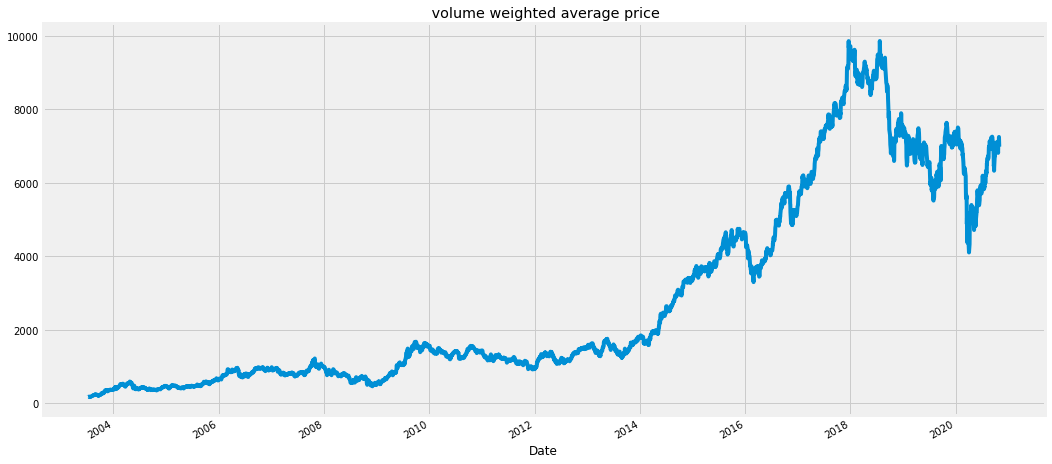

In [20]:
df_vwap['VWAP'].plot(figsize=(16,8),title=' volume weighted average price')

It appears that Maruti had a more or less steady increase in its stock price from 2004 to the mid-2018 window. There seems to be some drop in 2019, though. Let's further analyze the data for the year 2018.

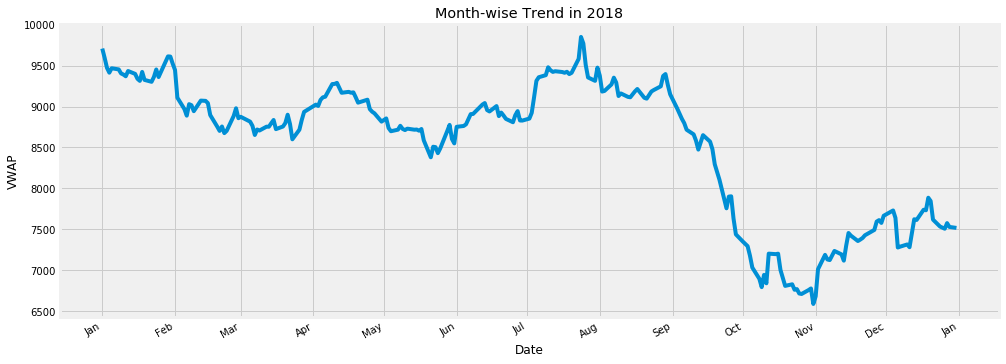

In [26]:
ax = df_vwap.loc['2018', 'VWAP'].plot(figsize=(15,6))
ax.set_title('Month-wise Trend in 2018'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'));

We see a dip in the stock prices, particularly around the end of October and November. Let's further zoom in on these dates.

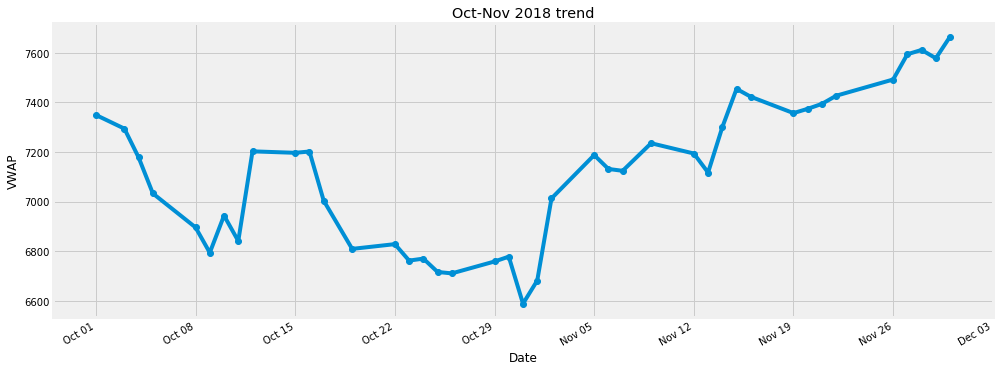

In [27]:
ax = df_vwap.loc['2018-10':'2018-11','VWAP'].plot(marker='o', linestyle='-',figsize=(15,6))
ax.set_title('Oct-Nov 2018 trend'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

So there is a dip in stock prices around the last week of October and the first week of November. One could investigate it further by finding out if there was some special event on that day.

# 4. Feature Extraction ⚒
Let’s extract time and date features from the Date column.

In [28]:
df_vwap.reset_index(inplace=True)
df_vwap['year'] = df_vwap.Date.dt.year
df_vwap['month'] = df_vwap.Date.dt.month
df_vwap['day'] = df_vwap.Date.dt.day
df_vwap['day of week'] = df_vwap.Date.dt.dayofweek



#Set Date column as the index column.
df_vwap.set_index('Date', inplace=True)
df_vwap.head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,165.95,2003,7,9,2
2003-07-10,166.74,2003,7,10,3
2003-07-11,172.45,2003,7,11,4
2003-07-14,177.91,2003,7,14,0
2003-07-15,176.88,2003,7,15,1


# 4. Time resampling ⏳

Time resampling is a way to aggregate data with respect to a defined time period. We have the stock price data for each day, but this doesn’t make much sense if we want to see the trend for a financial institution. What is useful is the aggregated information for every month or every quarter. This helps the management to get an overview instantly and then make decisions based on this overview.

Pandas library has a resample() function which resamples time-series data. The resample method in pandas is similar to its groupby method since it is essentially grouping by a specific time span.

In [29]:
df_vwap.resample(rule = 'A').mean()[:5]

,VWAP,year,month,day,day of week
Date,,,,,
2003-12-31,266.608468,2003.0,9.604839,16.298387,2.016129
2004-12-31,430.522835,2004.0,6.559055,15.708661,2.047244
2005-12-31,494.328566,2005.0,6.541833,15.733068,2.000000
2006-12-31,845.582160,2006.0,6.552000,15.976000,2.056000
2007-12-31,887.107871,2007.0,6.554217,15.843373,1.987952


Let’s understand what this means:

    df_vwap.resample() is used to resample the stock data.
    The ‘A’ stands for year-end frequency and denotes the offset values we want to resample the data.
    mean() indicates that we want the average stock price during this period.
    
    So here we have the average stock data displayed on the 31st of each month. Below is a complete list of the offset values. The list can be found in the pandas’ documentation.
    https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
    

We can also use time sampling to plot charts for some specific columns.

Text(0.5, 1.0, 'Yearly Mean VWAP for Maruti')

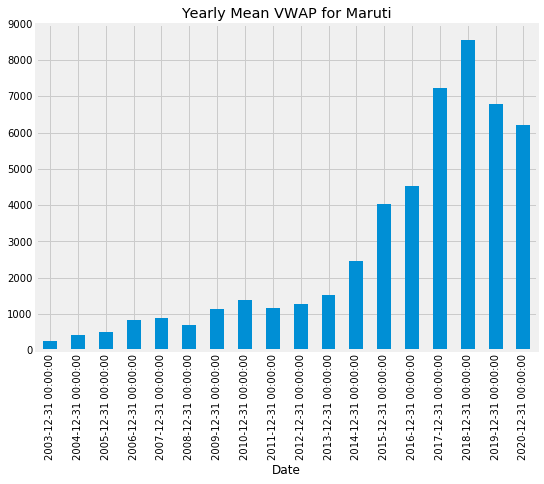

In [30]:
plt.rcParams['figure.figsize'] = (8, 6)
df_vwap['VWAP'].resample('A').mean().plot(kind='bar')
plt.title('Yearly Mean VWAP for Maruti')

The above bar plot corresponds to Maruti’s average adjusted close price at year-end. Similarly, here is the monthly maximum opening price for Maruti

Text(0.5, 1.0, 'Yearly start Mean VWAP for Maruti')

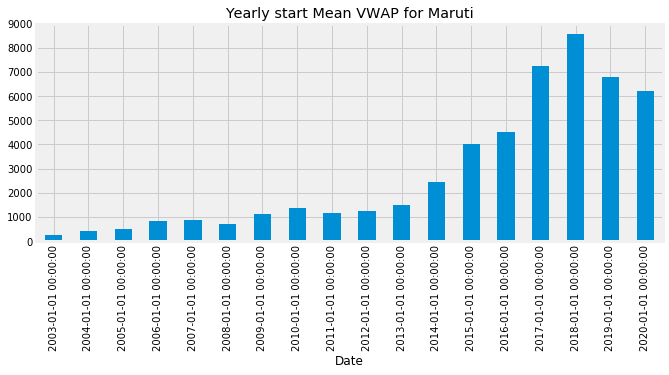

In [31]:
df_vwap['VWAP'].resample('AS').mean().plot(kind='bar',figsize = (10,4))
plt.title('Yearly start Mean VWAP for Maruti')

# 6. Time Shifting ⏲️

Sometimes, it is desirable to shift or move the data forward or backward in time. This shifting is done along a time index by the desired number of time-frequency increments. Here is the original dataset without any shiftings.

In [32]:
df_vwap.head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,165.95,2003,7,9,2
2003-07-10,166.74,2003,7,10,3
2003-07-11,172.45,2003,7,11,4
2003-07-14,177.91,2003,7,14,0
2003-07-15,176.88,2003,7,15,1


# 6.1 Forward Shifting

To shift our data forward, we will pass the desired number of periods (or increments) through the shift() function, which in this case, needs to be a positive value. Let’s move our data forward by one period or index, which means that all values which earlier corresponded to row N will now belong to row N+1. Here is the output:

In [33]:
df_vwap.shift(1).head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,NaN,NaN,NaN,NaN,NaN
2003-07-10,165.95,2003.0,7.0,9.0,2.0
2003-07-11,166.74,2003.0,7.0,10.0,3.0
2003-07-14,172.45,2003.0,7.0,11.0,4.0
2003-07-15,177.91,2003.0,7.0,14.0,0.0


# 6.2 Backward Shifting

Similarly, there is a concept of backward shifting. To shift our data backward, the number of periods (or increments) to change by, must be negative.

In [34]:
df_vwap.shift(-1).head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,166.74,2003.0,7.0,10.0,3.0
2003-07-10,172.45,2003.0,7.0,11.0,4.0
2003-07-11,177.91,2003.0,7.0,14.0,0.0
2003-07-14,176.88,2003.0,7.0,15.0,1.0
2003-07-15,177.59,2003.0,7.0,16.0,2.0


# 6.3 Shifting based off Time String Code

We can also use the offset from the offset table (from the Time Resampling section )for time-shifting. For that, we will make use of the pandas' tshift() function. We only need to pass in the periods and freq parameters. The period attribute defines the number of steps to be shifted, and the freq parameters denote the size of those steps.

Let’s say we want to shift the data 3 months forward:

In [35]:
df_vwap.tshift(periods=3, freq = 'M').head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-09-30,165.95,2003,7,9,2
2003-09-30,166.74,2003,7,10,3
2003-09-30,172.45,2003,7,11,4
2003-09-30,177.91,2003,7,14,0
2003-09-30,176.88,2003,7,15,1


# 7. Rolling Windows 🧈

Time series data can be noisy, and as a result, it becomes difficult to gauge the trend or pattern due to the high fluctuations. For instance, here is the visualization of the VWAP price of the Maruti stock over the years.

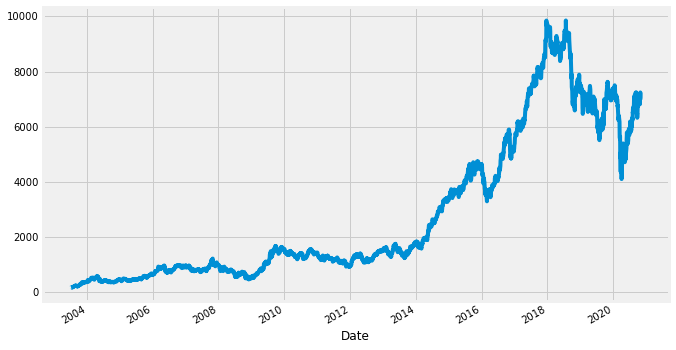

In [36]:
df_vwap['VWAP'].plot(figsize = (10,6))

There’s quite a bit of noise here because this is the daily data. It would be nice to average this out by a week, which is where a rolling mean comes in. A rolling mean or Moving average is a transformation method that tends to average out this noise from the data. The idea is simple. Split the data into windows, and the data in each of these windows is then aggregated by some function like mean(), median(), count(), etc.

For this example, we shall use a rolling mean for seven days.

In [37]:
df_vwap.rolling(7).mean().head(10)

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,NaN,NaN,NaN,NaN,NaN
2003-07-10,NaN,NaN,NaN,NaN,NaN
2003-07-11,NaN,NaN,NaN,NaN,NaN
2003-07-14,NaN,NaN,NaN,NaN,NaN
2003-07-15,NaN,NaN,NaN,NaN,NaN
2003-07-16,NaN,NaN,NaN,NaN,NaN
2003-07-17,173.285714,2003.0,7.0,13.142857,2.142857
2003-07-18,173.530000,2003.0,7.0,14.428571,2.428571
2003-07-21,173.520000,2003.0,7.0,16.000000,2.000000


The first six values have become blank because there wasn’t enough data to fill since we chose a window of 7 days.

So what are the significant effects of calculating a moving average or using this rolling method? Our data becomes a lot less noisy and becomes more reflective of the trend than the actual data. Let’s plot this out. We shall plot the original data and then the rolling data for 30 days in the same graph.

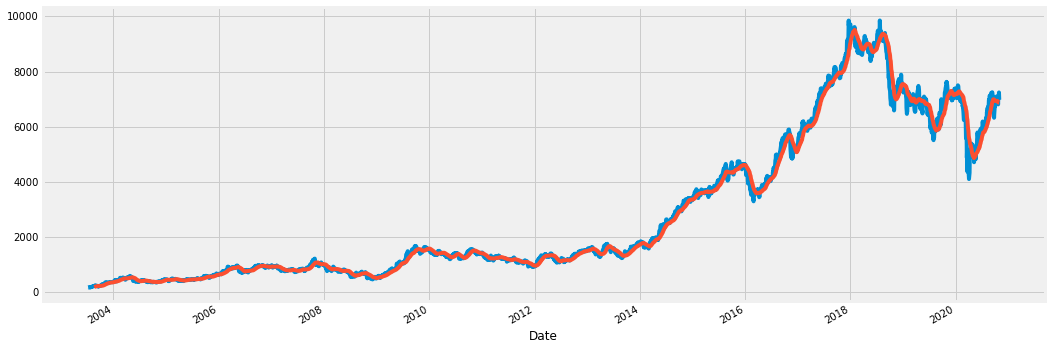

In [39]:
df_vwap['VWAP'].plot()
df_vwap.rolling(window=30).mean()['VWAP'].plot(figsize=(16, 6))

The blue line is the original noisy data, while the orange line with a 30-day rolling window ends up having not as much noise as the blue line. Now, once you run this code, an important aspect to keep in mind is that the first 29 days aren’t going to have that orange line because there wasn’t enough data actually to calculate that rolling mean.

# Conclusion

Pandas is a powerful library with a lot of inbuilt functions for analyzing time-series data. This article saw how Python’s pandas’ library could be used for wrangling and visualizing time series data. We also performed tasks like time sampling, time-shifting, and rolling on the stock data. These are usually the first steps in investigating any time series data. Going forward, we could use this data in several ways. One way could be to perform a basic financial analysis by calculating the daily percentage change in stocks to get an idea about the stock price volatility. Another way would be to use this data to predict Maruti’s stock price for the next few days by employing Machine Learning Techniques. Whatever assignment you choose, the preliminary steps shown in this article would come in handy.